In [13]:
# Hyperparameter tuning with gridsearchCV and RandomSearchCV
# Demostrating how to optimize models

# Importing base requirements
import pandas as pd

# loading df
diabetes_df = pd.read_csv('../../_datasets/diabetes_clean.csv')

# EDA probing (Explratory Data Analysis)
print(diabetes_df.describe())

       pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   30.500000   
75%       6.000000  140.250000   80.000000   32.000000  127.250000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   2

In [14]:
# EDA corralation 
# 0 means negative corralation, 1 is positive
print(diabetes_df.corr())

             pregnancies   glucose  diastolic   triceps   insulin       bmi  \
pregnancies     1.000000  0.129459   0.141282 -0.081672 -0.073535  0.017683   
glucose         0.129459  1.000000   0.152590  0.057328  0.331357  0.221071   
diastolic       0.141282  0.152590   1.000000  0.207371  0.088933  0.281805   
triceps        -0.081672  0.057328   0.207371  1.000000  0.436783  0.392573   
insulin        -0.073535  0.331357   0.088933  0.436783  1.000000  0.197859   
bmi             0.017683  0.221071   0.281805  0.392573  0.197859  1.000000   
dpf            -0.033523  0.137337   0.041265  0.183928  0.185071  0.140647   
age             0.544341  0.263514   0.239528 -0.113970 -0.042163  0.036242   
diabetes        0.221898  0.466581   0.065068  0.074752  0.130548  0.292695   

                  dpf       age  diabetes  
pregnancies -0.033523  0.544341  0.221898  
glucose      0.137337  0.263514  0.466581  
diastolic    0.041265  0.239528  0.065068  
triceps      0.183928 -0.113970  

Axes(0.125,0.11;0.775x0.77)


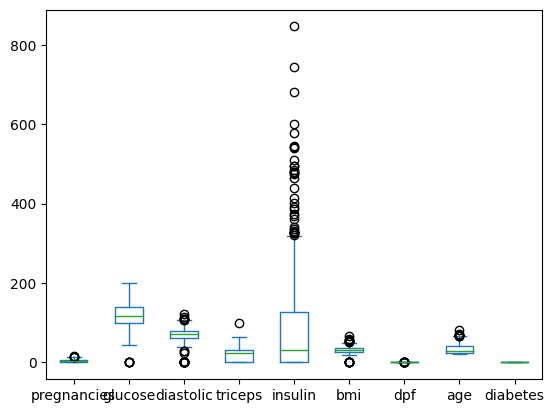

In [15]:
# EDA 
# Box Plot
print(diabetes_df.plot(kind='box'))

In [16]:
# EDA displaying columns I need for parsing X, y
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import numpy as np

# Parsing df for our features and variables
X, y = diabetes_df.drop('diabetes', axis= 1).values , diabetes_df['diabetes'].values

# splitting for validation
# train_test_split (features, target, split size feat(70%) targ(30%), setting seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creating kfold validation
# 5 splits, do shuffle the data before any evaluation is done, setting seed
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating the parameter grid for hyperparameter tuning via grid search.
# Alpha range created by np.linspace(), start, stop, step/spacing (ie. getting 20 evenly spaced values from start to stop).
param_grid = {'alpha' : np.linspace(0.0001, 1, 20)}

# Instantiate lasso regression model
lasso = Lasso()

# Instantiate lasso_cv regression model by using GridSearchCV
# what this does is use the param_grid dictionary that we created in order to find the best paramaters, in this case we are only looking for alpha param.
# It takes (our model, the grid we want, cross validation desired)
lasso_cv = GridSearchCV(lasso, param_grid= param_grid, cv=kf)

# Fitting the lasso_cv model to training data
lasso_cv.fit(X_train, y_train)

# Displaying best paramaters
# Displays the Alpha
# Displays the R^2 value
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

# Terminal Output
# Tuned lasso paramaters: {'alpha': 0.0001}
# Tuned lasso score: 0.29604907639403455

# R^2 at 29.60% says that the features are only describing 29.60% of the target, not good not good.
# This is hhighlighting that using the optimal hyperparameters does NOT guarantee a high performing model.

Tuned lasso paramaters: {'alpha': 0.0001}
Tuned lasso score: 0.29604907639403466


In [18]:
# What can we do to fix the model?
# Lets attempt to use RandomizedSearchCV instead of using GridSearchCV
# RandomizedSearchCV will randomly choose our hyperparameters for us, this can be a good tactic when defined
# searches for parameter values are unfruitful.
# Ramdom Searching for parameters will produce random outputs this is expected behavior for random search cross-validation. 
# Since the algorithm is randomly sampling hyperparameters, each time it runs, it may sample different hyperparameters, which could result in a different score.


# Import
from sklearn.model_selection import RandomizedSearchCV

# Create the Hyperparameter space
# alpha: Regularization strength, which controls the amount of shrinkage applied to the regression coefficients. Higher values of alpha result in more regularization and smaller coefficient values.
# tol: Tolerance for stopping criterion. The algorithm for fitting the Lasso model stops iterating when the change in the coefficients is less than this value.
# fit_intercept: Boolean indicating whether or not to include an intercept term in the regression model.
# normalize: Boolean indicating whether or not to normalize the input data (i.e., center and scale the predictors to have zero mean and unit variance) before fitting the regression model.
# selection: Method for choosing the coefficients to update at each iteration. "cyclic" updates each coefficient in turn, while "random" chooses a random coefficient to update at each iteration.
# positive: Boolean indicating whether or not to constrain the coefficients to be positive. This can be useful when the response variable is always positive, for example.
params = {"alpha": np.linspace(0.0001, 1.0, 50),
          "tol": np.linspace(0.0001, 1.0, 50),
          "fit_intercept": [True, False],
        #   "normalize": [True, False],
          "selection": ["cyclic", "random"],
          "positive": [True, False]}

# Instantiate the RandomizedSearchCV object
lasso_rcv = RandomizedSearchCV(lasso, params, cv=kf, scoring='r2')

# Fitting the model
lasso_rcv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Lasso Regression Best Parameters: {}".format(lasso_rcv.best_params_))
print("Tuned Lasso Regression Best {} Score: {}".format(lasso_rcv.scoring, lasso_rcv.best_score_))

# Terminal Output
# Tuned Lasso Regression Best Parameters: {'tol': 0.08172448979591837, 
#                                          'selection': 'cyclic', 
#                                          'positive': True, 
#                                          'normalize': True, 
#                                          'fit_intercept': True, 
#                                          'alpha': 0.0001}
# Tuned Lasso Regression Best r2 Score: 0.3007282643171336


Tuned Lasso Regression Best Parameters: {'tol': 0.2449734693877551, 'selection': 'random', 'positive': True, 'fit_intercept': True, 'alpha': 0.12253673469387756}
Tuned Lasso Regression Best r2 Score: 0.29913532925195
